In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dataset.AI4CodeProblemClassificationDataset import AI4CodeProblemClassificationDataset
dataset = AI4CodeProblemClassificationDataset(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_problem_class_cpp", 
r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_cpp", 220, 53, 53)

In [3]:
dataset.create()

processing p02717 ...
... finished p02717
processing p02718 ...
... finished p02718
processing p02719 ...
... finished p02719
processing p02723 ...
... finished p02723
processing p02724 ...
... finished p02724
processing p02725 ...
... finished p02725
processing p02729 ...
... finished p02729
processing p02730 ...
... finished p02730
processing p02731 ...
... finished p02731
processing p02753 ...
... finished p02753
processing p02754 ...
... finished p02754
processing p02755 ...
... finished p02755
processing p02760 ...
... finished p02760
processing p02766 ...
... finished p02766
processing p02767 ...
... finished p02767
processing p02771 ...
... finished p02771
processing p02772 ...
... finished p02772
processing p02773 ...
... finished p02773
processing p02779 ...
... finished p02779
processing p02783 ...
... finished p02783
processing p02784 ...
... finished p02784
processing p02785 ...
... finished p02785
processing p02786 ...
... finished p02786
processing p02790 ...
... finished

In [13]:
import pickle
embedding_map = None
with open(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\astnode2vec_cpp\cpp_embeddings.pkl", "rb") as f:
    embedding_map = pickle.load(f)

In [14]:
len(embedding_map)

121

In [11]:
from keras.metrics import Precision, Recall
import tensorflow as tf
from classifier.Tbcnn import Tbcnn
labels = dataset.get_labels()
node_map = dataset.get_vocabulary_map()
model = Tbcnn(80, num_kernels=600, num_classes=len(labels))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',
              metrics = [tf.keras.metrics.CategoricalAccuracy(), Precision(), Recall()])

In [17]:
from generators.FileStreamDataGenerator import FileStreamDataGenerator

train_files = dataset.get_train_files()
val_files = dataset.get_val_files()

training_generator = FileStreamDataGenerator(train_files, labels, node_embeddings=embedding_map, batch_size=1, shuffle=True)
validation_generator = FileStreamDataGenerator(val_files, labels, node_embeddings=embedding_map, batch_size=1, shuffle=False)
model.fit(training_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
22880/22880 [==============================] - 201s 9ms/step - loss: 1.4975 - categorical_accuracy: 0.6312 - precision_3: 0.7615 - recall_3: 0.5370 - val_loss: 1.6523 - val_categorical_accuracy: 0.6299 - val_precision_3: 0.7601 - val_recall_3: 0.5323
Epoch 2/5
22880/22880 [==============================] - 203s 9ms/step - loss: 1.4723 - categorical_accuracy: 0.6351 - precision_3: 0.7649 - recall_3: 0.5384 - val_loss: 1.6294 - val_categorical_accuracy: 0.6312 - val_precision_3: 0.7591 - val_recall_3: 0.5414
Epoch 3/5
22880/22880 [==============================] - 198s 9ms/step - loss: 1.4678 - categorical_accuracy: 0.6353 - precision_3: 0.7560 - recall_3: 0.5413 - val_loss: 1.6674 - val_categorical_accuracy: 0.6138 - val_precision_3: 0.7583 - val_recall_3: 0.5174
Epoch 4/5
22880/22880 [==============================] - 219s 10ms/step - loss: 1.5227 - categorical_accuracy: 0.6231 - precision_3: 0.7533 - recall_3: 0.5224 - val_loss: 1.7350 - val_categorical_accuracy: 0.6159 - va

In [19]:
test_files = dataset.get_test_files()
test_generator = FileStreamDataGenerator(test_files, labels, node_embeddings=embedding_map, batch_size=1, shuffle=False)
y_hat = model.predict(test_generator)
metrics = model.evaluate(test_generator)

5512/5512 [==============================] - 36s 6ms/step - loss: 1.7983 - categorical_accuracy: 0.5677 - precision_3: 0.7052 - recall_3: 0.4595


In [21]:
from numpy import argmax
labels = list(test_generator.get_label_lookup().keys())
expected_labels = []
predicted_labels = []
for i in range(len(test_generator)):
    _, y = test_generator[i]
    expected_label = labels[argmax(y)]
    predicted_label = labels[argmax(y_hat[i])]
    expected_labels.append(expected_label)
    predicted_labels.append(predicted_label)

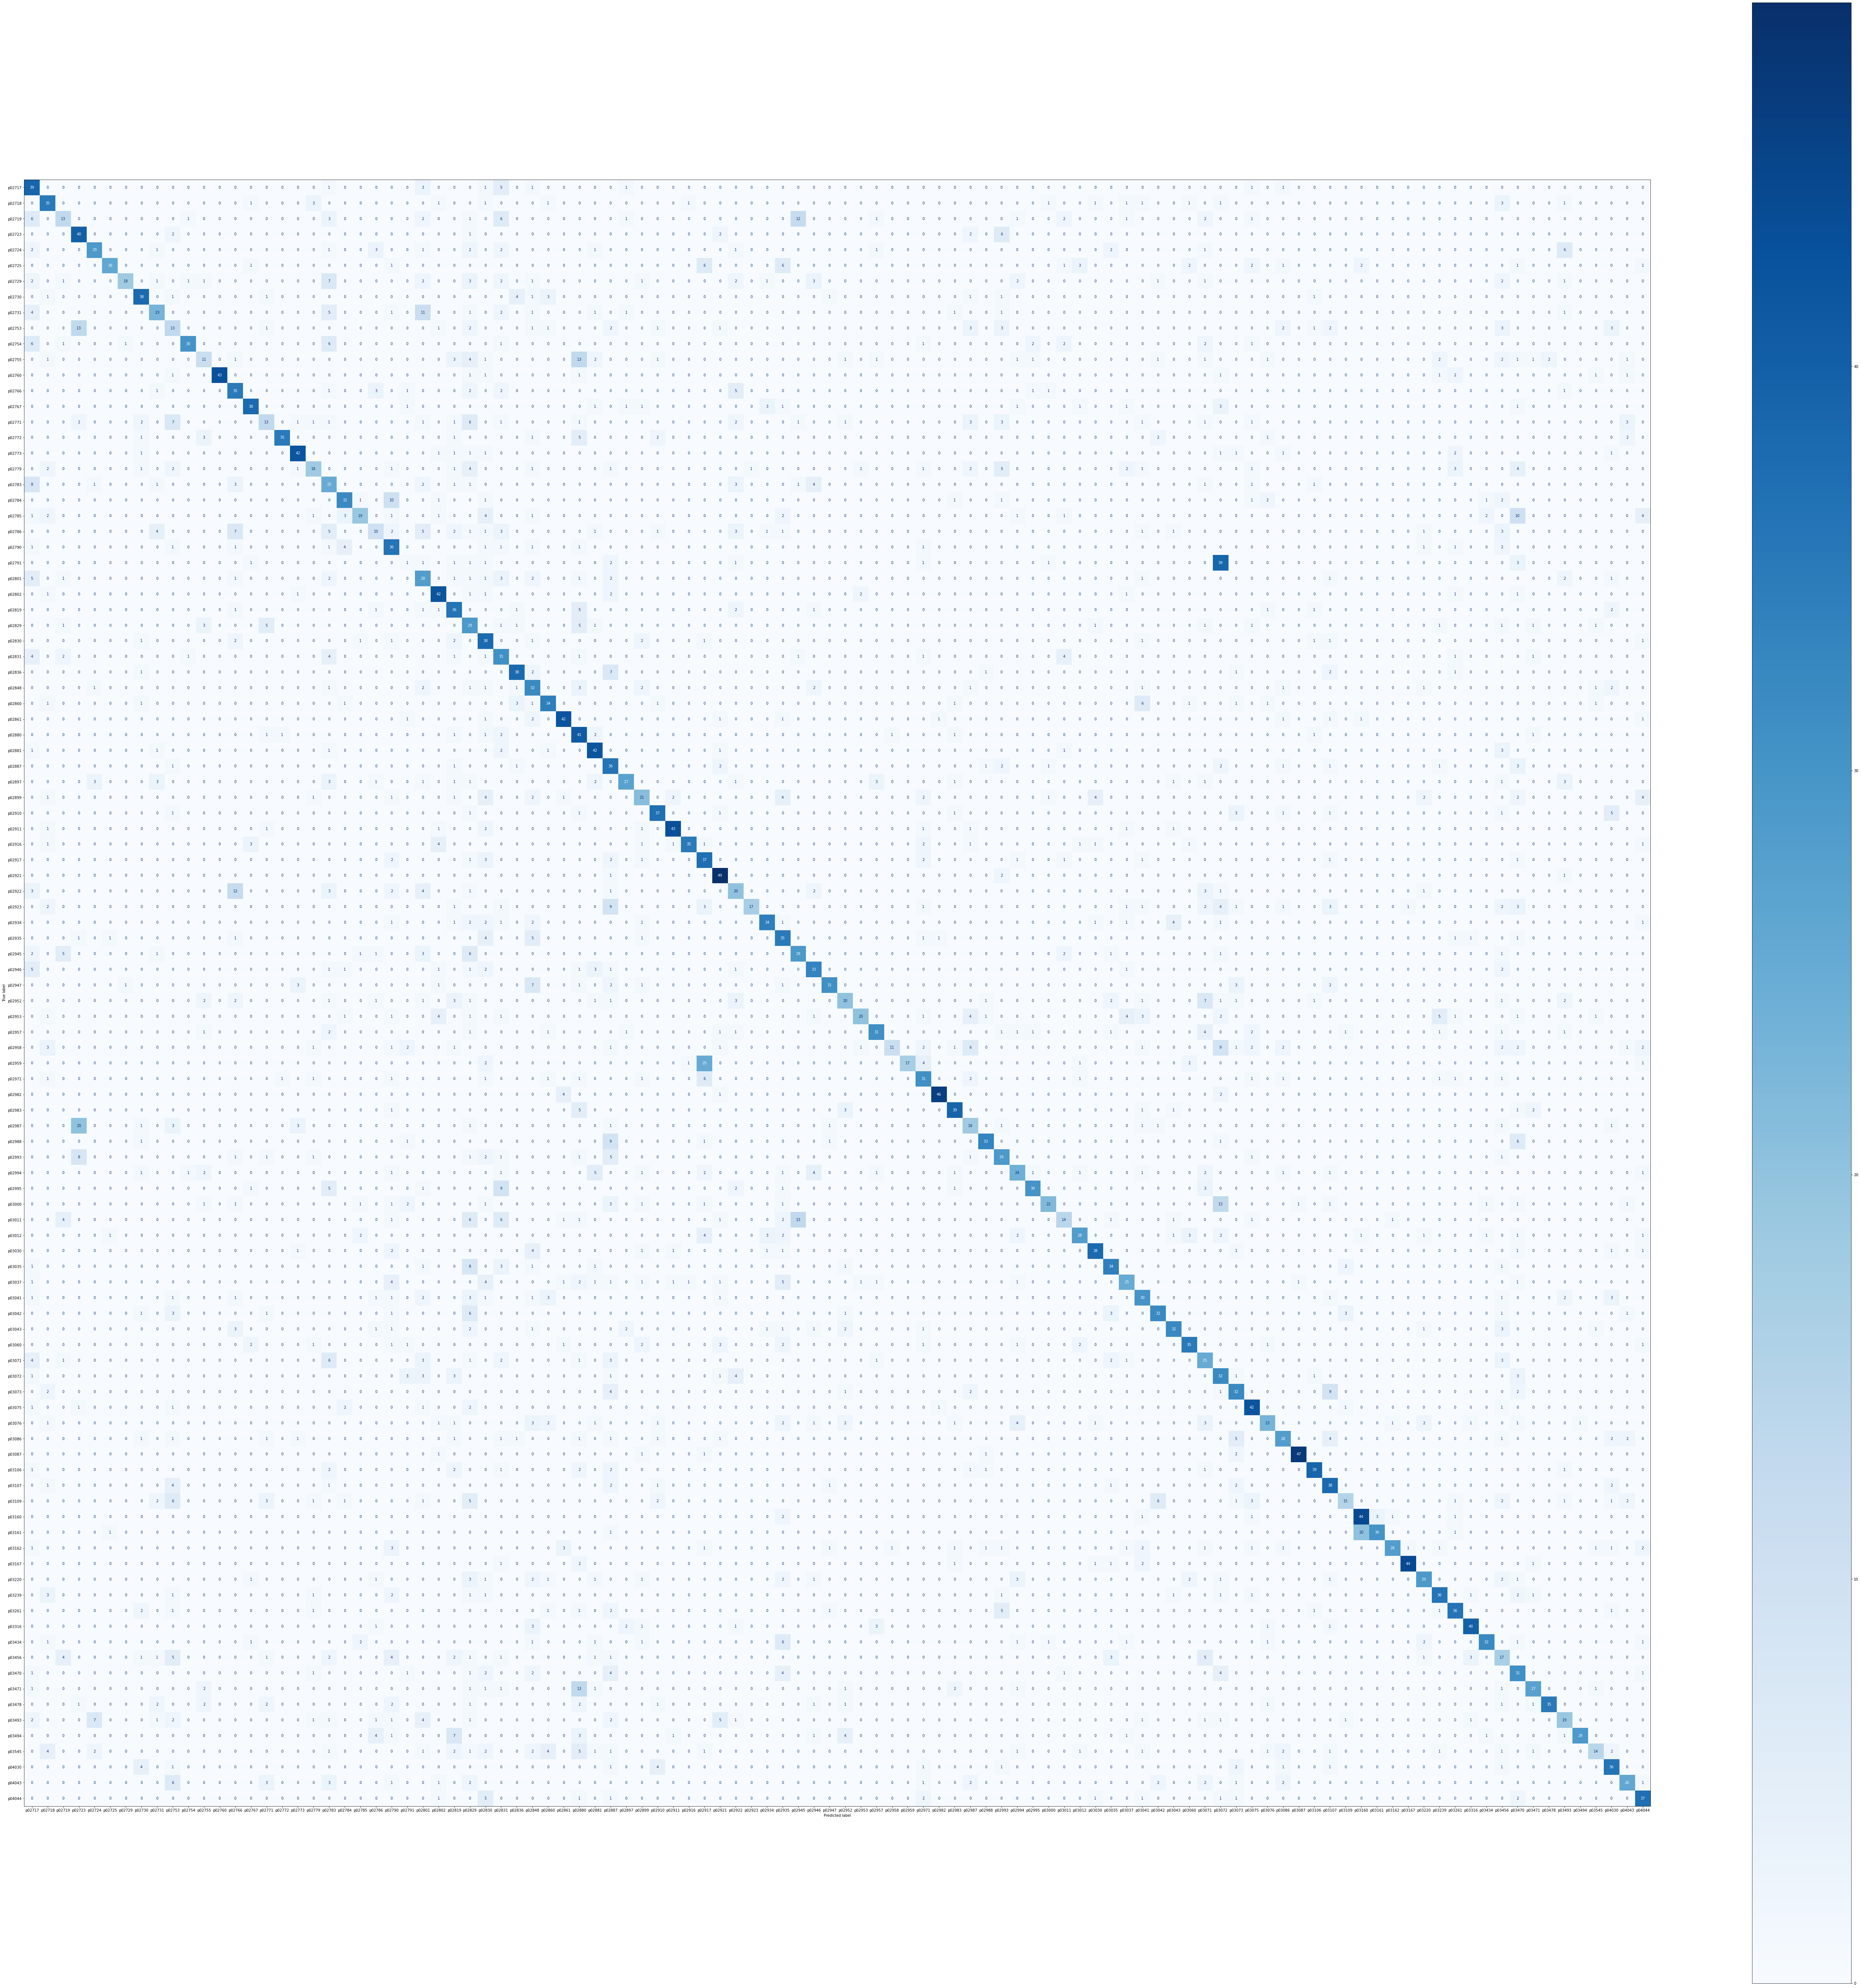

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
_, ax = plt.subplots(1, 1, figsize=(100, 100))
cm = confusion_matrix(expected_labels, predicted_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()